# QUANTUM  BLOCKCHAIN

We begin, as usual, importing the libraries and functions we will use.

In [18]:
from os.path import join

import pandas as pd
import numpy as np

from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.visualization import plot_bloch_vector

from quantumchain import Node, Blockchain

import warnings
warnings.filterwarnings("ignore")

To use a real Quantum Computer we need to load our IBM account

In [2]:
# IBMQ.save_account('Add Token')
# provider = IBMQ.enable_account('1605b7aa60a8259f4385b612193f560d6ff53d50ab1f962d7de8aebf518c479eed1526450dc556743b10968b87b3ff0c7b12ed45cb1ed3af93dab37823dc455e')
# IBMQ.load_account()
# IBMQ.disable_account()

In [3]:
# device = provider.get_backend('ibmq_manila')

# Creating a first blockchain

With just one command, defining one python object, we can setup our first blockchain... indeed, a Quantum Blockchain! When the object initializes, nodes folders containing transactions and blocks are created from an initialize folder (also created from scratch). When creating a blockchain we can pass in some parameters, like number of nodes, number of transactions per block and the length of some random sequences used in the algorithm (created using entangled quantum circuits). 

In [4]:
# Quantum Blockchain with 6 nodes, 3 transactions per block and length 10 of random sequences
QuantumChain = Blockchain(6,4,10)

Adding transactions to the blockchain is easy. You can input them with arrays in the add_transactions method in the blockchain class. 

In [5]:
# Let's add our first transactions to the blockchain

sending_node = [1,2,2,3,5,0,2]
coins_sent = [2,3,1,3,3,5,1]
receiving_node = [0,1,3,4,3,1,1]

QuantumChain.add_transactions(sending_node, coins_sent, receiving_node)

We can visualize the transactions file, for example, node 3 transaction file. Note that the sending node appears with negative coins and the receiving node with positive coins.

In [6]:
transaction = pd.read_csv(join('Data', 'Node3','transactions.csv'))
transaction.head()

,Node,Transaction 1,Transaction 2,Transaction 3,Transaction 4,Transaction 5,Transaction 6,Transaction 7,Transaction 8,Transaction 9,Transaction 10,Transaction 11
0,0,20.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-5.0,0.0
1,1,20.0,0.0,0.0,0.0,-2.0,3.0,0.0,0.0,0.0,5.0,1.0
2,2,20.0,0.0,0.0,0.0,0.0,-3.0,-1.0,0.0,0.0,0.0,-1.0
3,3,20.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.0,3.0,0.0,0.0
4,4,20.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0


If a node tries to send coins without enough funds in the wallet then an **_Exception Error_** is risen. The same thing happens if a node tries to send coins to itself.

In [ ]:
# QuantumChain.add_transactions([1], [1000], [2])  # Throws error: Not enough funds

We can also visualize the data in the blockchain. For example, lets see block number 2 of node 4. We see that each block stores the old wallet data, a random number given by each node, the transactions, the payment for solving the previous block, the new wallet and the fidelity table.

In [9]:
# node4 = Quantum_Blockchain.node_list[4]
block = pd.read_csv(join('Data', 'Node4', 'Blocks', 'block2.csv'))
block.head()

,Node,Old Wallet,Random number,Transaction 5,Transaction 6,Transaction 7,Transaction 8,Payment,Wallet,prev_fidelity 0,prev_fidelity 1,prev_fidelity 2,prev_fidelity 3,prev_fidelity 4,prev_fidelity 5
0,0,20.0,110101010,2.0,0.0,0.0,0.0,0.6,22.6,0.387050,0.055097,0.038933,0.986150,0.981896,0.055839
1,1,20.0,1101110011,-2.0,3.0,0.0,0.0,0.6,21.6,0.769738,0.427888,0.029513,0.622818,0.181068,0.783469
2,2,20.0,1111001001,0.0,-3.0,-1.0,0.0,0.2,16.2,0.049251,0.247441,0.330318,0.025530,0.987710,0.070559
3,3,20.0,110001011,0.0,0.0,1.0,-3.0,0.2,18.2,0.451155,0.693841,0.441661,0.248755,0.644863,0.245573
4,4,20.0,110111001,0.0,0.0,0.0,3.0,0.2,23.2,0.668661,0.057879,0.333009,0.873111,0.161272,0.153116


When transactions feel a block, nodes create a hash for each block, which then is converted to a Quantum State that is teleported (using Quantum teleportation protocol) to the rest of the nodes. The nodes compare the fidelities of their block states and the states of the rest of the nodes. Let's visualize the Qubit obtained by hashing node4 second block.

In [11]:
node4 = QuantumChain.node_list[4]
block_path = join('Data', 'Node4','Blocks','block2.csv')

hash_angles = node4.state_parameters(block_path)
print('Hashed block state: ', hash_angles)

Hashed block state:  [3.3974508352631716, 2.1119624251281195]


Because this is a Hash, you should verify that everytime it's called, it retrieves the same angles (for the same document). Let's now represent it in Bloch Sphere:

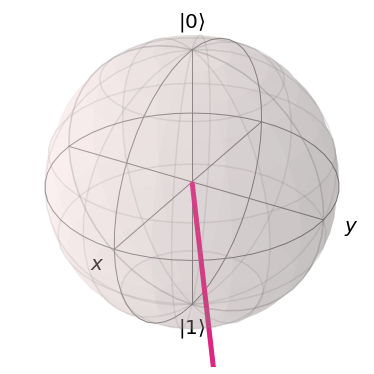

In [14]:
# We add last coordinate (radial) as 1
qubit_vector = hash_angles + [1]
plot_bloch_vector(qubit_vector)

As we said, this state is then sent throgh a Quantum Channel using a Quantum Teleportation Protocol, which uses entangled states to share a Qubit. This is done with the method _send_states_.

In [15]:
QuantumChain.send_states(hash_angles)

[(-0.12758043149716908+0j), (-0.5109262420143955+0.8501044692977701j)]

Which is the same as the input vector. This can be verify builing the circuit that rotates $|0\rangle$ by angles $\theta$ and $\phi$ in hash_angles

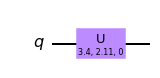

In [17]:
# Circuit to rotate |0>
state_circ = QuantumCircuit(1)
state_circ.u(hash_angles[0], hash_angles[1],0,0)
        
state_circ.draw('mpl')

In [19]:
# Get final state after passing |0> throught the circuit

backend = Aer.get_backend('qasm_simulator')
state_circ.save_statevector()
qobj = assemble(state_circ)     # Create a Qobj from the circuit for the simulator to run

result = backend.run(qobj).result() 
result.get_statevector()

Statevector([-0.12758043-0.j        , -0.51092624+0.85010447j],
            dims=(2,))


Once the states are sent, each node calculates the fidelities. They should all agree in the fidelities table! We can visualize the last fidelity table obtained by node 0.

In [21]:
fidelity = pd.read_csv(join('Data', 'Node0','fidelity.csv'))
fidelity.head()

,Node,Fidelity node 0,Fidelity node 1,Fidelity node 2,Fidelity node 3,Fidelity node 4,Fidelity node 5
0,0,0.000000,0.115883,0.083426,0.975452,0.954735,0.498717
1,1,0.115883,0.000000,0.788432,0.182626,0.177493,0.200696
2,2,0.083426,0.788432,0.000000,0.022779,0.006200,0.641566
3,3,0.975452,0.182626,0.022779,0.000000,0.993845,0.381708
4,4,0.954735,0.177493,0.006200,0.993845,0.000000,0.389014


Fidelities are obtained projecting the sent qubit to the node's own qubit state. Of course, in reality this is done with many copies of the same vectors and calculating the probabilities to measure one in the others basis. It is then important that we know how to build this states in a unique way. This is done with the _sha256_block_ and _state_parameters_ method of the node class.

With the blockchain class, we can generate sequences of random numbers using a Quantum Circuit:

In [23]:
QuantumChain.random_numbers()

['0000000011',
 '1101011100',
 '1111111000',
 '1111000100',
 '1111111111',
 '0010011100']

This is done using the following circuit and measuring multiple times in each qubit, in order to obtain a sequence of (in this case) 6 random numbers of 10 digits (measuring 10 times)

## Play with the blockchain!

Once we have seen the basics of this blockchain, we invite you to investigate the functions and discover by yourself how it works!

In [24]:
# Your code